# CNN Classifier for Fashion MNIST
MNIST is considered the "hello world" of machine learning. Below you  
will see my implementation of a CNN that classifies images from the  
Fashion MNIST dataset. The dataset consists of 70,000 28x28 images of shoes and  
clothing from a company called Zalando. My model achieves about 91 percent  
accuracy on the validationd set. The dataset is loaded in from the Keras package. I also    
graphed the training and test set accuracies over the epochs. The results are listed below. 

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/15
600/600 [==============================] - 49s 82ms/step - loss: 0.5842 - accuracy: 0.7884 - val_loss: 0.4284 - val_accuracy: 0.8494
Epoch 2/15
600/600 [==============================] - 49s 81ms/step - loss: 0.3742 - accuracy: 0.8657 - val_loss: 0.3716 - val_accuracy: 0.8660
Epoch 3/15
600/600 [==============================] - 49s 81ms/step - loss: 0.3241 - accuracy: 0.8857 - val_loss: 0.3403 - val_accuracy: 0.8760
Epoch 4/15
600/600 [==============================] - 49s 81ms/step - loss: 0.2919 - accuracy: 0.8945 - val_loss: 0.3093 - val_accuracy: 0.8882
Epoch 5/15
600/600 [==============================] - 49s 81ms/step - loss: 0.2669 - accuracy: 0.9043 - val_loss: 0.2969 - val_accuracy: 0.8960
Epoch 6/15
600/600 [==============================] - 49s 81ms/step - loss: 0.2474 - accuracy: 0.9108 - val_loss: 0.2724 - val_accuracy: 0.9054
Epoch 7/15
600/600 [==============================] - 49s 81ms/step - los

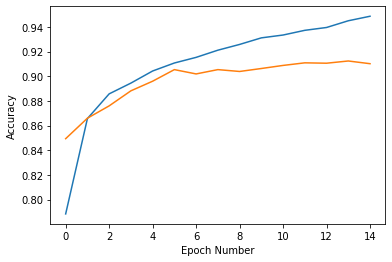

In [1]:

from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import layers
from keras import models
import matplotlib.pyplot as plt

(X_train, y_train), (valid_x, valid_y) = fashion_mnist.load_data()

model = models.Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu',input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))


X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255
valid_x = valid_x.reshape((10000, 28, 28, 1))
valid_x = valid_x.astype('float32') / 255
y_train = to_categorical(y_train)
valid_y = to_categorical(valid_y)


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
          validation_data = (valid_x, valid_y),
          batch_size=100,
          epochs=15,
          verbose=1)

# Plot history: MAE
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.show()

